In [12]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix


In [13]:
for dirpath, dirname, filenames in os.walk('COVID_IEEE'):
    print(f'there are {len(filenames)} files in {dirpath}')

there are 0 files in COVID_IEEE
there are 668 files in COVID_IEEE/normal
there are 536 files in COVID_IEEE/covid
there are 619 files in COVID_IEEE/virus


In [14]:
data_dir = pathlib.Path('COVID_IEEE')
class_name = np.array([sorted(item.name for item in data_dir.glob("*"))])
class_name

array([['covid', 'normal', 'virus']], dtype='<U6')

In [15]:
def view_image(target, target_class):
    target_folder = os.path.join(target, target_class)  
    random_image = random.sample(os.listdir(target_folder), 1)[0] 
    print(random_image)  # Print the name of the random image
    img = mpimg.imread(os.path.join(target_folder, random_image))  # Correctly join the path to read the image
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    plt.show()
    return img

person1438_virus_2452.jpeg


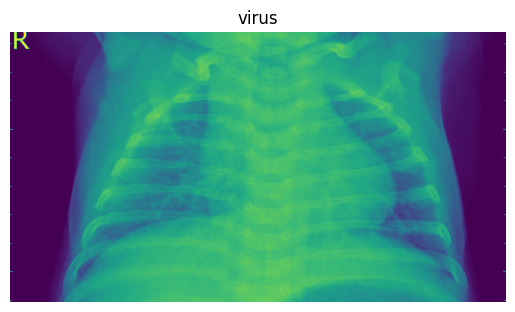

In [16]:
img =  view_image(data_dir, 'virus')

IM-0011-0001-0002.jpeg


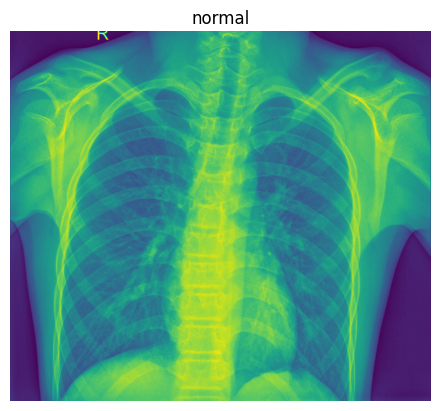

In [17]:
img =  view_image(data_dir, 'normal')

In [18]:
data = []
labels = []

for category, label in zip(['covid', 'normal', 'virus'], [0, 1, 2]):
    category_dir = os.listdir(f"{data_dir}/{category}")
    for image_file in category_dir:
        image_path = f"{data_dir}/{category}/{image_file}"
        image = cv2.imread(image_path)
        if image is not None:
            image = cv2.resize(image, (224, 224))
            data.append(image)
            labels.append(label)
        else:
            print(f"Warning: Could not read image {image_path}")

In [19]:
img_data = np.array(data) / 255.0 # this is for normalize the data , i need to devide for 255
img_labels = np.array(labels)

In [20]:

X_train, X_test, y_train, y_test = train_test_split(data, img_labels, test_size=0.20, random_state=42)

In [21]:
X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [22]:
model = Sequential()

#Block Number 1
model.add(Conv2D(input_shape = (224,224,3), filters=32 ,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 2
model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))


model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 3
model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

model.add(MaxPool2D((2,2)))

# Fully Connected layer
model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))

model.add(Dense(units=256, activation="relu"))


model.add(Dense(units=3, activation="softmax"))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,241,315 (100.10 MB)

 Trainable params: 26,241,315 (100.10 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(X_train, y_train, validation_split=0.3, epochs=15, batch_size=32)

Epoch 1/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.5014 - loss: 1.0528 - val_accuracy: 0.8151 - val_loss: 0.5493
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.8580 - loss: 0.4230 - val_accuracy: 0.9041 - val_loss: 0.2879
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.9130 - loss: 0.2745 - val_accuracy: 0.9224 - val_loss: 0.2300
Epoch 4/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.9394 - loss: 0.1871 - val_accuracy: 0.9201 - val_loss: 0.2641
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.9393 - loss: 0.1697 - val_accuracy: 0.9361 - val_loss: 0.1871
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.9747 - loss: 0.0930 - val_accuracy: 0.9292 - val_loss: 0.2222
Epoch 7/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.9623 - loss: 0.1344 - val_accuracy: 0.8744 - val_loss: 0.3088
Epoch 8/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.9672 - loss: 0.0984 - val_accuracy: 0.9361 - val_loss:

Text(0.5, 1.0, 'Training-Validation Accuracy')

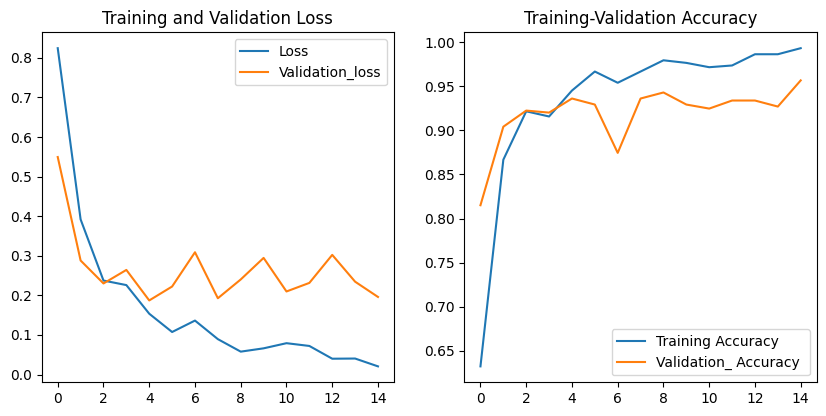

In [25]:

#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")
     

In [26]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)


12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 522ms/step


In [27]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       108
           1       0.90      0.98      0.94       129
           2       0.98      0.90      0.94       128

    accuracy                           0.95       365
   macro avg       0.95      0.95      0.95       365
weighted avg       0.95      0.95      0.95       365



In [28]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred),
             columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,104,3,1
normal,2,126,1
virus,2,11,115


In [30]:
import tensorflow as tf

# Specify the local path to the downloaded weights file
weights_path = './mobilenet_1_0_224_tf_no_top.h5'

# Load the base model with the specified weights
base_model = tf.keras.applications.MobileNet(input_shape=[224, 224, 3], weights=weights_path, include_top=False)

for layer in base_model.layers:
    layer.trainable = False


In [32]:

model = Flatten()(base_model.output)

model = Dense(units=1024, activation="relu")(model)
model = Dense(units=512, activation="relu")(model)
model = Dense(units=256, activation="relu")(model)

prediction_layer = Dense(units=3, activation="softmax")(model)

In [34]:

model = Model(inputs = base_model.input, outputs = prediction_layer)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

In [35]:
model.fit(X_train, y_train, validation_split=0.3, epochs=15, batch_size=32)


Epoch 1/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 687ms/step - accuracy: 0.6437 - loss: 14.8960 - val_accuracy: 0.9338 - val_loss: 1.3647
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 617ms/step - accuracy: 0.9320 - loss: 1.1077 - val_accuracy: 0.9566 - val_loss: 1.3892
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 644ms/step - accuracy: 0.9782 - loss: 0.2637 - val_accuracy: 0.9635 - val_loss: 0.5778
Epoch 4/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 619ms/step - accuracy: 0.9861 - loss: 0.1300 - val_accuracy: 0.9452 - val_loss: 0.8626
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 594ms/step - accuracy: 0.9921 - loss: 0.0447 - val_accuracy: 0.9658 - val_loss: 0.6560
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 616ms/step - accuracy: 0.9948 - loss: 0.0662 - val_accuracy: 0.9749 - val_loss: 0.4931
Epoch 7/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 682ms/step - accuracy: 0.9890 - loss: 0.0924 - val_accuracy: 0.9521 - val_loss: 0.7573
Epoch 8/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 591ms/step - accuracy: 0.9850 - loss: 0.2011 - val_acc

Text(0.5, 1.0, 'Training-Validation Accuracy')

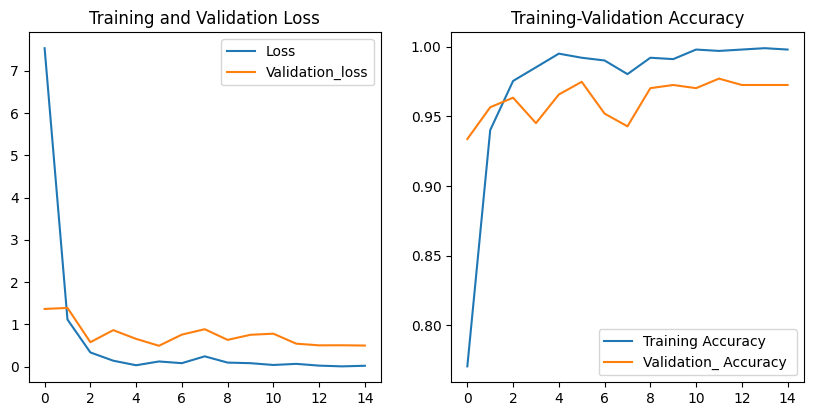

In [36]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [37]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 312ms/step


In [38]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])


,covid,normal,virus
covid,107,1,0
normal,0,119,10
virus,2,6,120
